In [397]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [398]:
import pandas as pd

data_original=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cars93[1].csv')
data_original.keys()

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [399]:
# hacer una copia para poder comparar luego
data=data_original.copy()

In [400]:
# Observar los datos 
data_original.head(10)

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
5,6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,4,2.2,110,5200,2565,No,16.4,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
6,7,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,Front,6,3.8,170,4800,1570,No,18.0,6,200,111,74,42,30.5,17.0,3470,USA,Buick LeSabre
7,8,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,Rear,6,5.7,180,4000,1320,No,23.0,6,216,116,78,45,30.5,21.0,4105,USA,Buick Roadmaster
8,9,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,Front,6,3.8,170,4800,1690,No,18.8,5,198,108,73,41,26.5,14.0,3495,USA,Buick Riviera
9,10,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,Front,8,4.9,200,4100,1510,No,18.0,6,206,114,73,43,35.0,18.0,3620,USA,Cadillac DeVille


In [401]:
# Verificar los datos 
data.isnull().sum()

Unnamed: 0             0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [402]:
# seleccionar X, y el objetivo Y
# dejo la variable price porque me sirve para visualizar que tan alejadosestan los precios entre si 
keys = ['Manufacturer', 'Model', 'Type', 'Price', 'Min.Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make']
y = 'Price'
keys

['Manufacturer',
 'Model',
 'Type',
 'Price',
 'Min.Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Man.trans.avail',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight',
 'Origin',
 'Make']

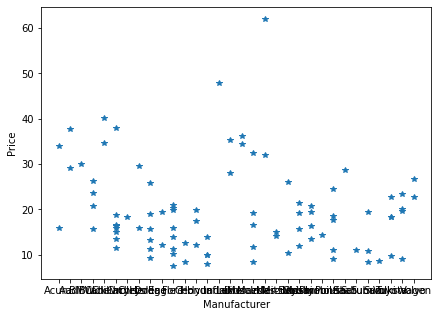

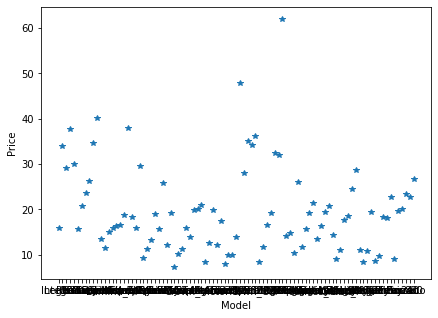

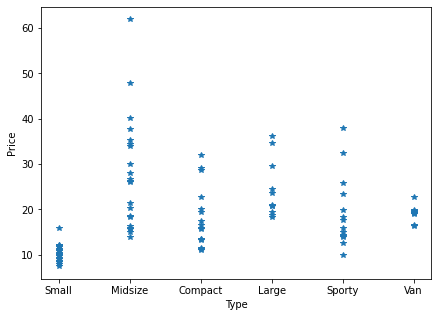

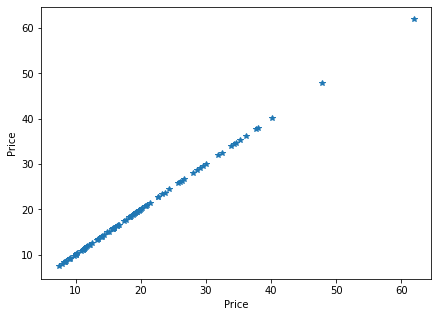

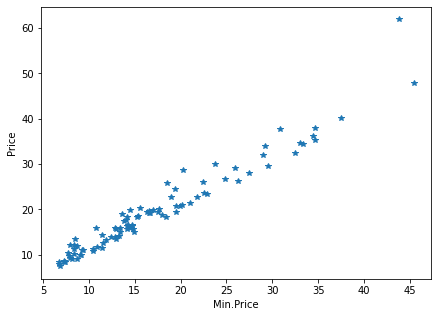

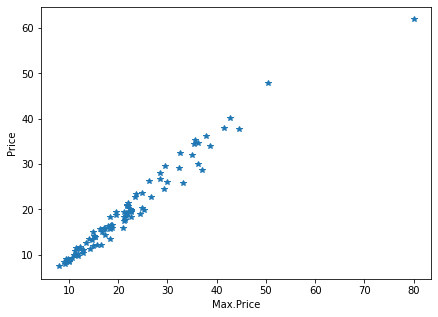

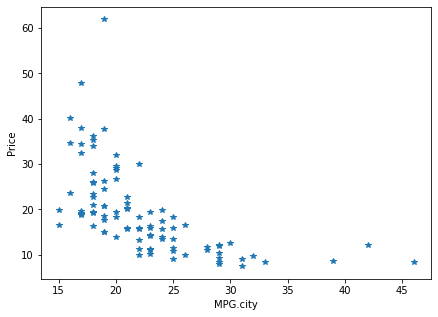

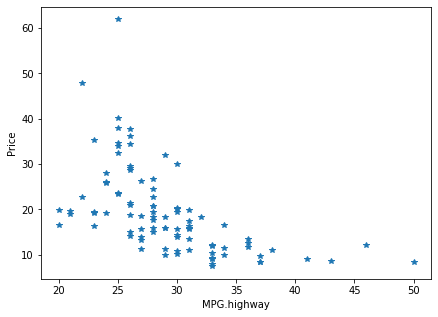

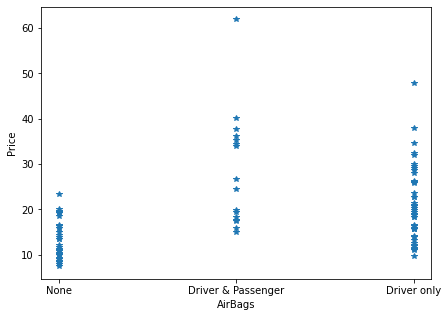

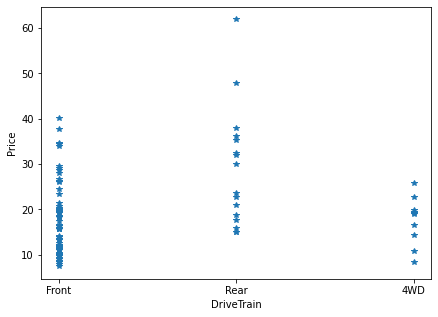

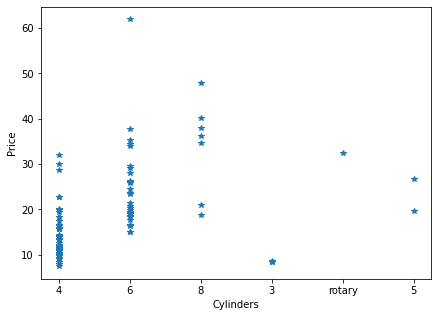

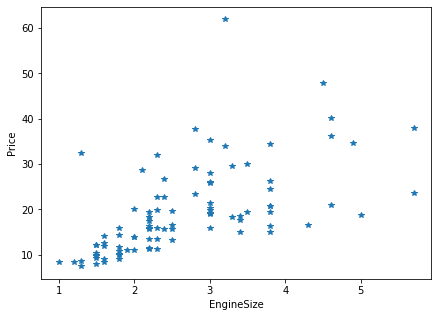

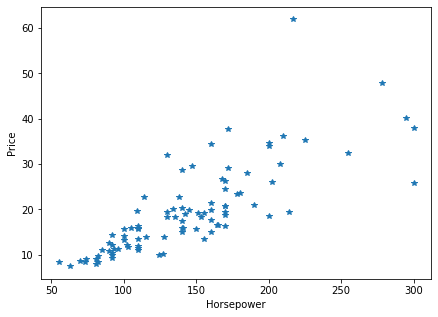

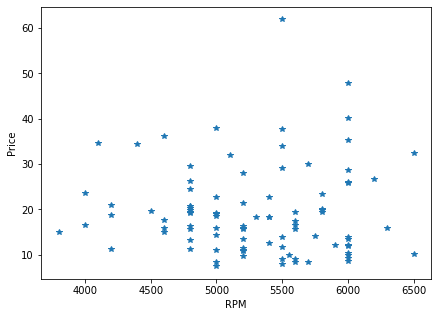

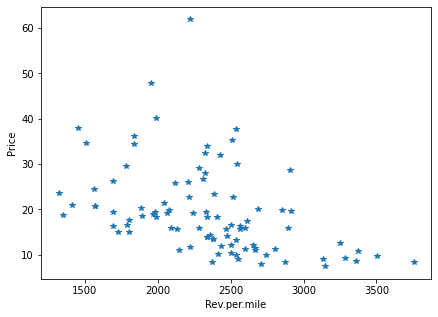

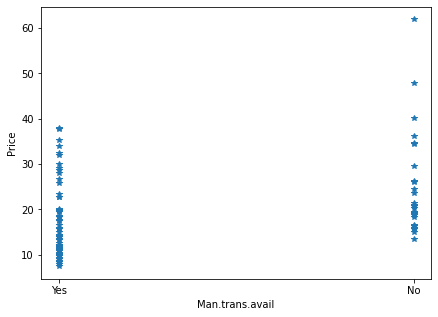

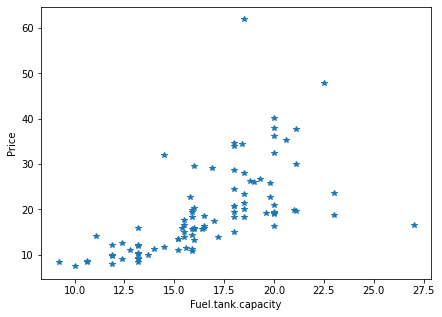

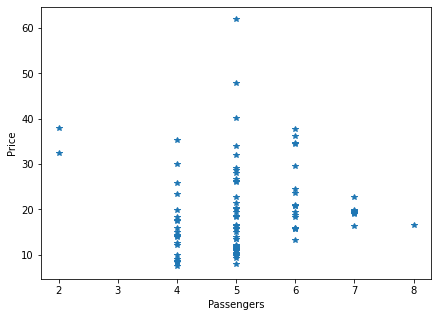

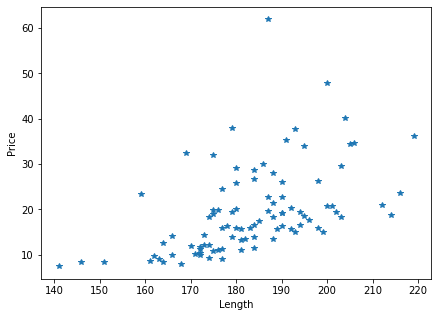

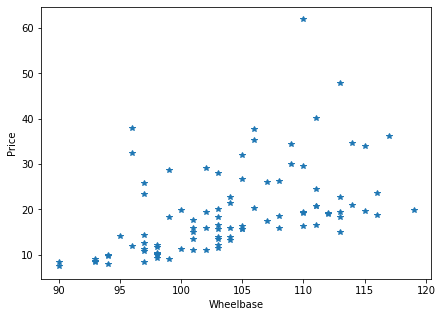

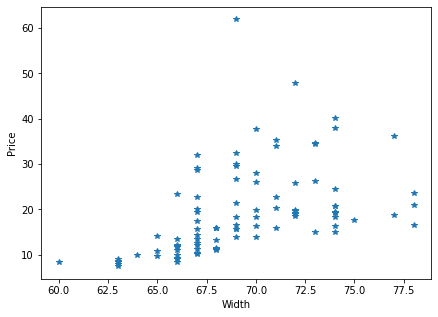

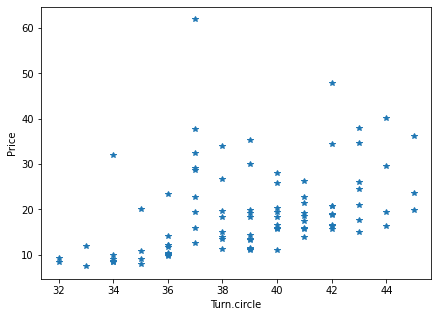

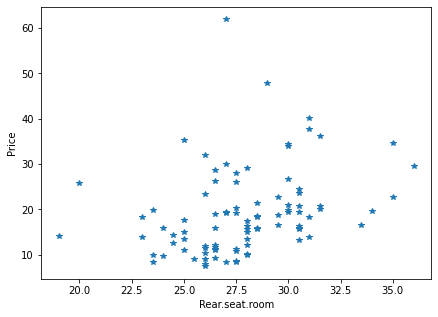

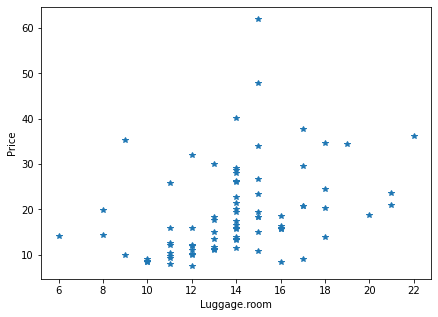

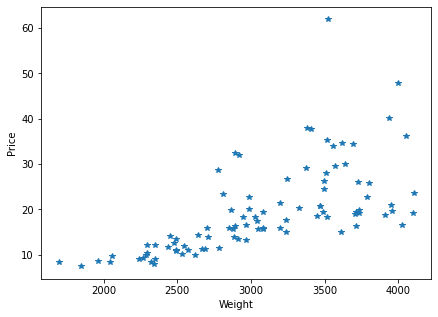

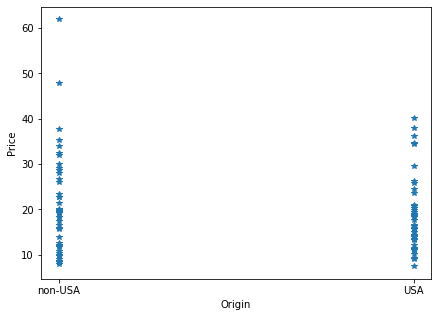

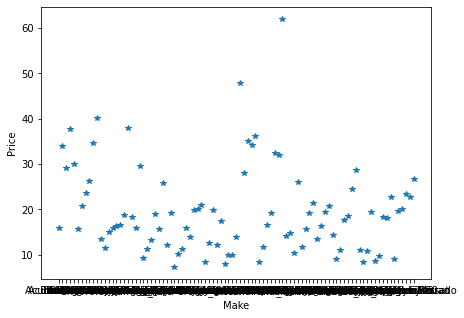

In [403]:
# Clasificación Visual

for k in keys:
  fig = plt.figure(figsize=(7,5))
  plt.plot(data[k],data[y],'*')
  plt.xlabel(k)
  plt.ylabel(y)
  plt.show()

In [404]:
# Binarización de los datos 
import numpy as np 

Y = np.array(data[y], dtype=int)
np.unique(Y,return_counts=True)
#El balanceo lo hago observan la gráfica pice vs price. Estoes para hacer una primera selección y luego estudiar en función del balanceo 
Y[Y<18] = 0
Y[Y>=18] = 1

np.unique(Y,return_counts=True)

(array([0, 1]), array([47, 46]))

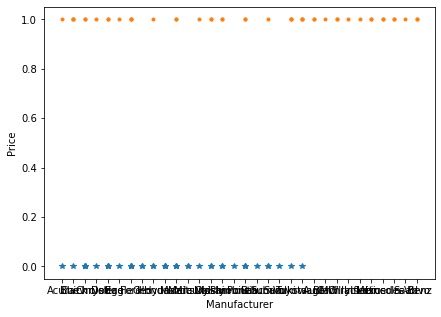

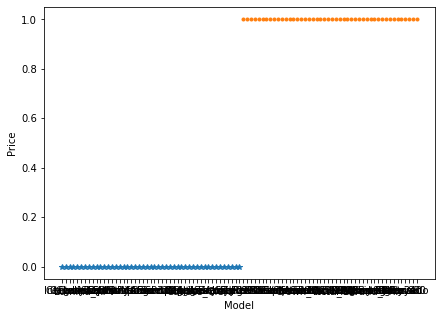

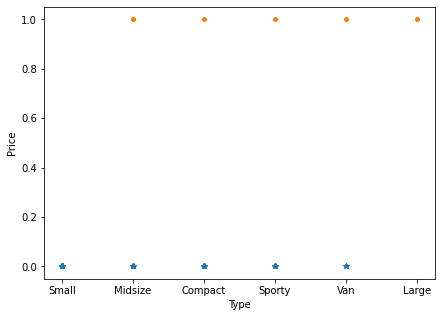

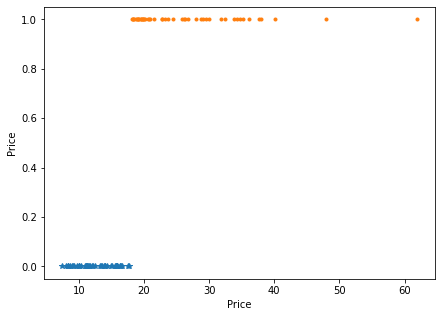

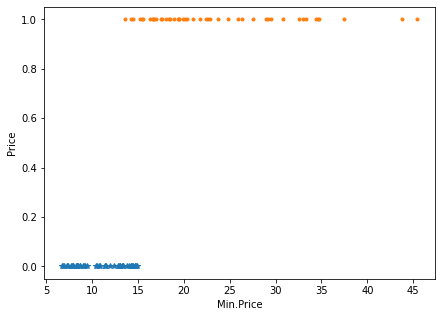

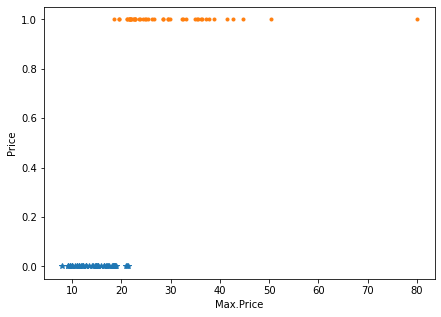

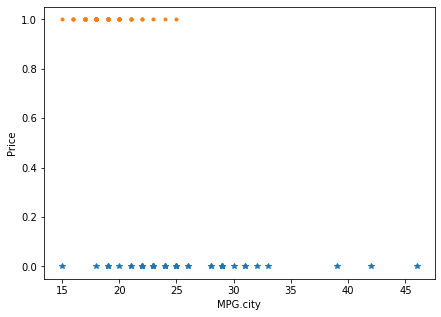

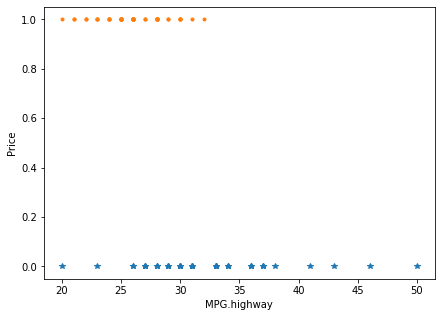

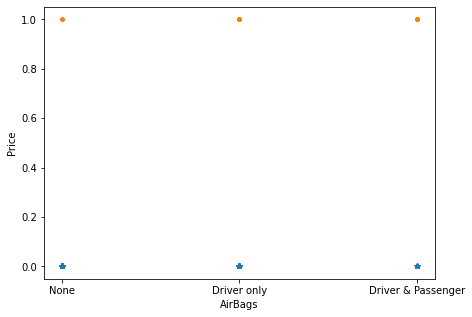

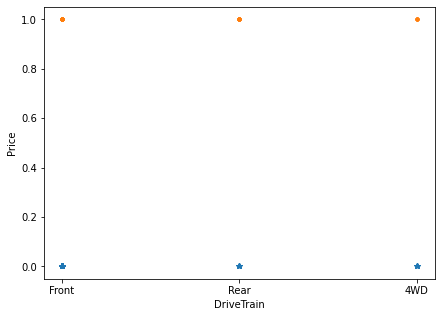

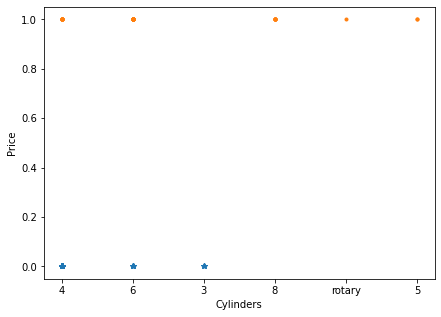

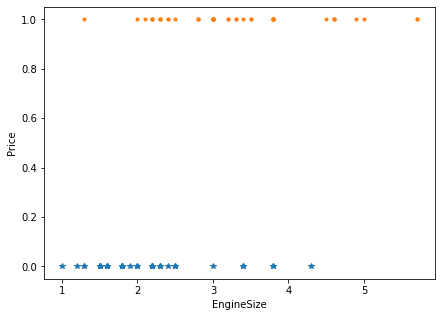

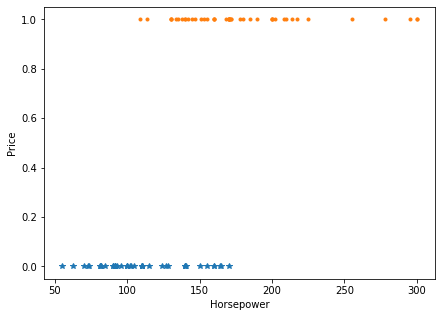

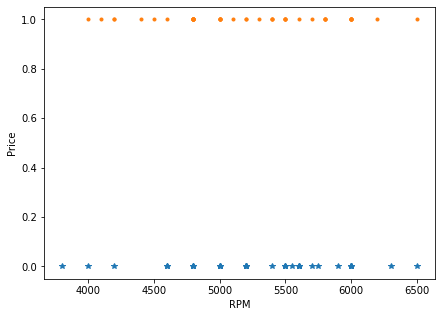

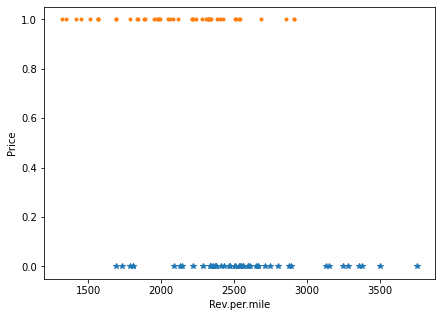

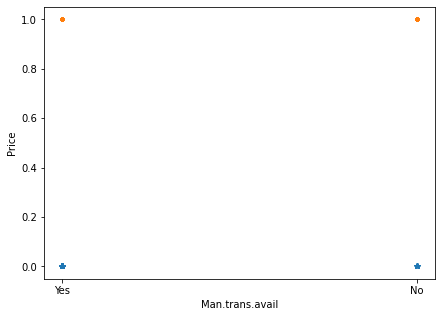

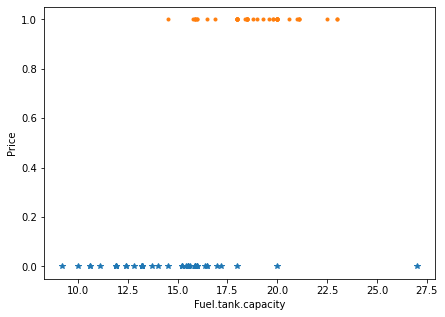

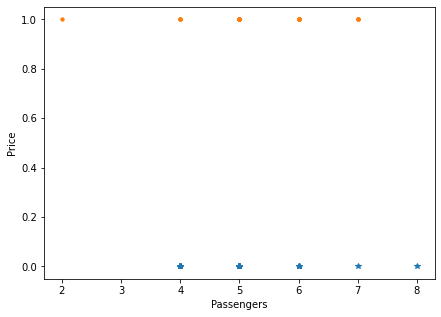

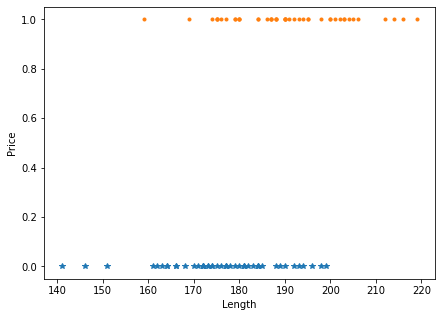

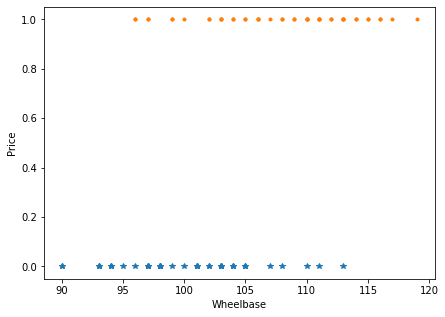

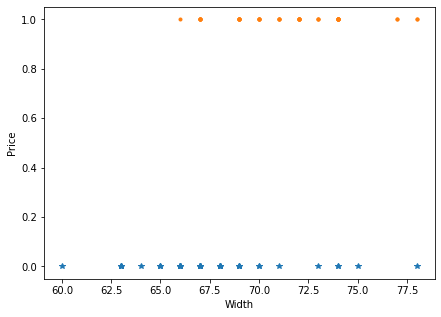

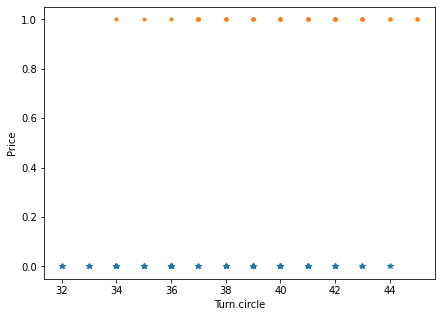

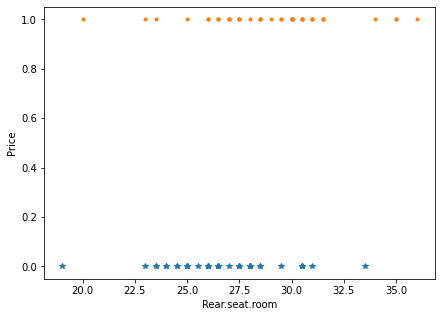

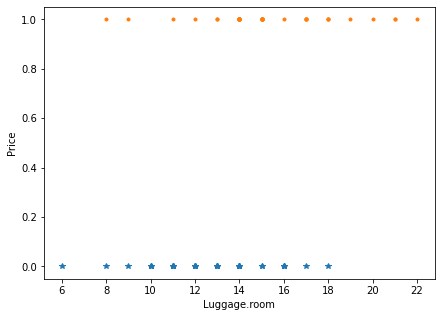

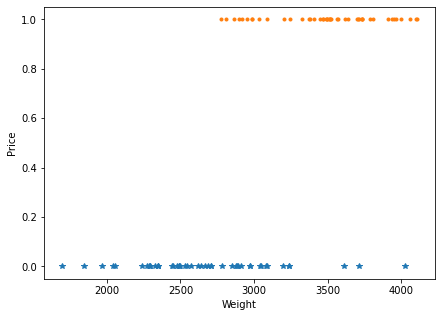

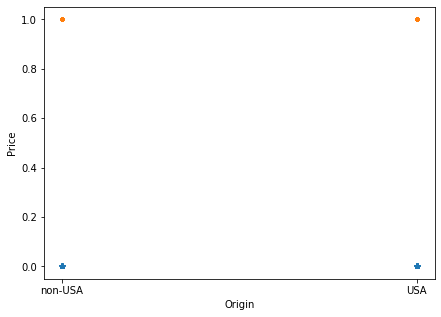

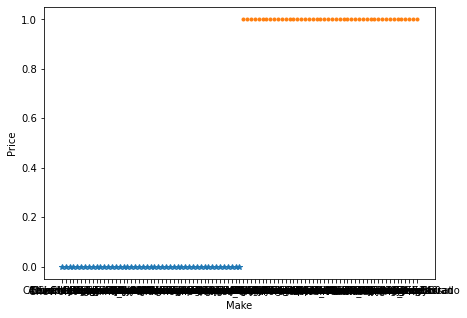

In [405]:
for k in keys:
  fig = plt.figure(figsize=(7,5))
  plt.plot(data[k][Y==0],Y[Y==0],'*')
  plt.plot(data[k][Y==1],Y[Y==1],'.')
  plt.xlabel(k)
  plt.ylabel(y)
  plt.show()

Teniendo en cuenta varios valores para el balanceo se puede observar de  las graficas anteriores que: 
Las caracteristicas de las cuales puede depender el precio son :'Manufacturer', 
 'Model',
  'Min.Price',
 'Max.Price',
  'MPG.city',
 'MPG.highway',
  'Cylinders',
 'EngineSize',
 'Horsepower',
 'Rev.per.mile',
'Width',
 'Length' y
  'Make'.

Por otra parte, las siguientes caracteristicas afectan en menor medida el precio de os autos:
 'Type',
 'AirBags',
 'DriveTrain',
 'RPM',
 'Man.trans.avail',
 'Fuel.tank.capacity',
 'Passengers',
 'Wheelbase',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight' y
 'Origin'.


In [406]:
!pip install corner


## ***Encontrando las correlaciones entre varaibles ***

## Manufacturer

In [407]:
# Arreglo de modelos 

np.unique(data['Manufacturer'])


array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrylser', 'Chrysler', 'Dodge', 'Eagle', 'Ford', 'Geo', 'Honda',
       'Hyundai', 'Infiniti', 'Lexus', 'Lincoln', 'Mazda',
       'Mercedes-Benz', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile',
       'Plymouth', 'Pontiac', 'Saab', 'Saturn', 'Subaru', 'Suzuki',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [408]:
# tamaño del arreglo de modelos 
manu=data['Manufacturer']
len(np.unique(manu))

32

In [409]:
# numerizando el arreglo de texto
# manu.replace(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet','Chrylser', 'Chrysler', 'Dodge', 'Eagle', 'Ford', 'Geo', 'Honda', 'Hyundai', 'Infiniti', 'Lexus', 'Lincoln', 'Mazda', 'Mercedes-Benz', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile','Plymouth', 'Pontiac', 'Saab', 'Saturn', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen', 'Volvo'], [1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32])

## Model

In [410]:
# Arreglo de modelos 
np.unique(data['Model'])


array(['100', '190E', '240', '300E', '323', '535i', '626', '850', '90',
       '900', 'Accord', 'Achieva', 'Aerostar', 'Altima', 'Astro',
       'Bonneville', 'Camaro', 'Camry', 'Capri', 'Caprice', 'Caravan',
       'Cavalier', 'Celica', 'Century', 'Civic', 'Colt', 'Concorde',
       'Continental', 'Corrado', 'Corsica', 'Corvette', 'Cougar',
       'Crown_Victoria', 'Cutlass_Ciera', 'DeVille', 'Diamante',
       'Dynasty', 'ES300', 'Eighty-Eight', 'Elantra', 'Escort', 'Eurovan',
       'Excel', 'Festiva', 'Firebird', 'Fox', 'Grand_Prix', 'Imperial',
       'Integra', 'Justy', 'Laser', 'LeBaron', 'LeMans', 'LeSabre',
       'Legacy', 'Legend', 'Loyale', 'Lumina', 'Lumina_APV', 'MPV',
       'Maxima', 'Metro', 'Mirage', 'Mustang', 'Passat', 'Prelude',
       'Previa', 'Probe', 'Protege', 'Q45', 'Quest', 'RX-7', 'Riviera',
       'Roadmaster', 'SC300', 'SL', 'Scoupe', 'Sentra', 'Seville',
       'Shadow', 'Silhouette', 'Sonata', 'Spirit', 'Stealth', 'Storm',
       'Summit', 'Sunbird', 'S

In [411]:
# tamaño del arreglo de modelos 
model=data['Model']
len(np.unique(model))

93

In [412]:
# generar un arreglo con numeros del 1 al 94
modnum=np.arange(1,94)
modnum

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93])

In [413]:
# (sustituyendo) numerizando el arreglo de texto
# model.replace(['100', '190E', '240', '300E', '323', '535i', '626', '850', '90',...



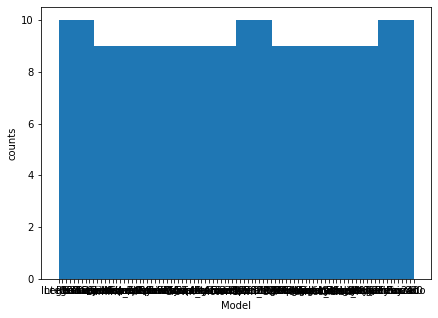

In [414]:
# histograma para ver numero de carros por modelo
fig = plt.figure(figsize=(7,5))
plt.hist(data['Model'])
plt.xlabel('Model')
plt.ylabel('counts')
plt.show()

## Tipo 

In [415]:
# tamaño del arreglo de Type
Type=data['Type']
len(np.unique(Type))

6

In [416]:
# Arreglo de Types 
np.unique(data['Type'])

array(['Compact', 'Large', 'Midsize', 'Small', 'Sporty', 'Van'],
      dtype=object)

In [417]:
# numerizando los datos de texto
# Type.replace(['Compact', 'Large', 'Midsize', 'Small', 'Sporty', 'Van'], [1, 2, 3, 4,5,6])

## Make

In [418]:
# Arreglo de Make
np.unique(data['Make'])

array(['Acura Integra', 'Acura Legend', 'Audi 100', 'Audi 90', 'BMW 535i',
       'Buick Century', 'Buick LeSabre', 'Buick Riviera',
       'Buick Roadmaster', 'Cadillac DeVille', 'Cadillac Seville',
       'Chevrolet Astro', 'Chevrolet Camaro', 'Chevrolet Caprice',
       'Chevrolet Cavalier', 'Chevrolet Corsica', 'Chevrolet Corvette',
       'Chevrolet Lumina', 'Chevrolet Lumina_APV', 'Chrylser Concorde',
       'Chrysler Imperial', 'Chrysler LeBaron', 'Dodge Caravan',
       'Dodge Colt', 'Dodge Dynasty', 'Dodge Shadow', 'Dodge Spirit',
       'Dodge Stealth', 'Eagle Summit', 'Eagle Vision', 'Ford Aerostar',
       'Ford Crown_Victoria', 'Ford Escort', 'Ford Festiva',
       'Ford Mustang', 'Ford Probe', 'Ford Taurus', 'Ford Tempo',
       'Geo Metro', 'Geo Storm', 'Honda Accord', 'Honda Civic',
       'Honda Prelude', 'Hyundai Elantra', 'Hyundai Excel',
       'Hyundai Scoupe', 'Hyundai Sonata', 'Infiniti Q45', 'Lexus ES300',
       'Lexus SC300', 'Lincoln Continental', 'Lincoln To

In [419]:
# tamaño del arreglo de Type
Make=data['Make']
len(np.unique(Make))

93

In [420]:
# numerizando los datos de texto
# Make.replace(['Acura Integra', 'Acura Legend', 'Audi 100', 'Audi 90', 'BMW 535i',


# Sustituyendo valores numericos en la tabla 

In [421]:
# Reemplazando en el cuadro todas las variables numericas
data['Manufacturer']=data['Manufacturer'].replace(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrylser', 'Chrysler', 'Dodge', 'Eagle', 'Ford', 'Geo', 'Honda',
       'Hyundai', 'Infiniti', 'Lexus', 'Lincoln', 'Mazda',
       'Mercedes-Benz', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Saab', 'Saturn', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen', 'Volvo'], [1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32])

In [422]:
data['Model']=data['Model'].replace(['100', '190E', '240', '300E', '323', '535i', '626', '850', '90',
       '900', 'Accord', 'Achieva', 'Aerostar', 'Altima', 'Astro',
       'Bonneville', 'Camaro', 'Camry', 'Capri', 'Caprice', 'Caravan',
       'Cavalier', 'Celica', 'Century', 'Civic', 'Colt', 'Concorde',
       'Continental', 'Corrado', 'Corsica', 'Corvette', 'Cougar',
       'Crown_Victoria', 'Cutlass_Ciera', 'DeVille', 'Diamante',
       'Dynasty', 'ES300', 'Eighty-Eight', 'Elantra', 'Escort', 'Eurovan',
       'Excel', 'Festiva', 'Firebird', 'Fox', 'Grand_Prix', 'Imperial',
       'Integra', 'Justy', 'Laser', 'LeBaron', 'LeMans', 'LeSabre',
       'Legacy', 'Legend', 'Loyale', 'Lumina', 'Lumina_APV', 'MPV',
       'Maxima', 'Metro', 'Mirage', 'Mustang', 'Passat', 'Prelude',
       'Previa', 'Probe', 'Protege', 'Q45', 'Quest', 'RX-7', 'Riviera',
       'Roadmaster', 'SC300', 'SL', 'Scoupe', 'Sentra', 'Seville',
       'Shadow', 'Silhouette', 'Sonata', 'Spirit', 'Stealth', 'Storm',
       'Summit', 'Sunbird', 'Swift', 'Taurus', 'Tempo', 'Tercel',
       'Town_Car', 'Vision'], [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93])

In [423]:
data['Type']


0       Small
1     Midsize
2     Compact
3     Midsize
4     Midsize
       ...   
88        Van
89    Compact
90     Sporty
91    Compact
92    Midsize
Name: Type, Length: 93, dtype: object

In [424]:
data['Type']=data['Type'].replace(['Compact', 'Large', 'Midsize', 'Small', 'Sporty', 'Van'], [1, 2, 3, 4,5,6])

In [425]:
data['Make']=data['Make'].replace(['Acura Integra', 'Acura Legend', 'Audi 100', 'Audi 90', 'BMW 535i',
       'Buick Century', 'Buick LeSabre', 'Buick Riviera',
       'Buick Roadmaster', 'Cadillac DeVille', 'Cadillac Seville',
       'Chevrolet Astro', 'Chevrolet Camaro', 'Chevrolet Caprice',
       'Chevrolet Cavalier', 'Chevrolet Corsica', 'Chevrolet Corvette',
       'Chevrolet Lumina', 'Chevrolet Lumina_APV', 'Chrylser Concorde',
       'Chrysler Imperial', 'Chrysler LeBaron', 'Dodge Caravan',
       'Dodge Colt', 'Dodge Dynasty', 'Dodge Shadow', 'Dodge Spirit',
       'Dodge Stealth', 'Eagle Summit', 'Eagle Vision', 'Ford Aerostar',
       'Ford Crown_Victoria', 'Ford Escort', 'Ford Festiva',
       'Ford Mustang', 'Ford Probe', 'Ford Taurus', 'Ford Tempo',
       'Geo Metro', 'Geo Storm', 'Honda Accord', 'Honda Civic',
       'Honda Prelude', 'Hyundai Elantra', 'Hyundai Excel',
       'Hyundai Scoupe', 'Hyundai Sonata', 'Infiniti Q45', 'Lexus ES300',
       'Lexus SC300', 'Lincoln Continental', 'Lincoln Town_Car',
       'Mazda 323', 'Mazda 626', 'Mazda MPV', 'Mazda Protege',
       'Mazda RX-7', 'Mercedes-Benz 190E', 'Mercedes-Benz 300E',
       'Mercury Capri', 'Mercury Cougar', 'Mitsubishi Diamante',
       'Mitsubishi Mirage', 'Nissan Altima', 'Nissan Maxima',
       'Nissan Quest', 'Nissan Sentra', 'Oldsmobile Achieva',
       'Oldsmobile Cutlass_Ciera', 'Oldsmobile Eighty-Eight',
       'Oldsmobile Silhouette', 'Plymouth Laser', 'Pontiac Bonneville',
       'Pontiac Firebird', 'Pontiac Grand_Prix', 'Pontiac LeMans',
       'Pontiac Sunbird', 'Saab 900', 'Saturn SL', 'Subaru Justy',
       'Subaru Legacy', 'Subaru Loyale', 'Suzuki Swift', 'Toyota Camry',
       'Toyota Celica', 'Toyota Previa', 'Toyota Tercel',
       'Volkswagen Corrado', 'Volkswagen Eurovan', 'Volkswagen Fox',
       'Volkswagen Passat', 'Volvo 240', 'Volvo 850'], [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93])

In [426]:
data['AirBags']=data['AirBags'].replace(['Driver & Passenger', 'Driver only', 'None'],[1,2,3])

In [427]:
data['DriveTrain']=data['DriveTrain'].replace(['4WD', 'Front', 'Rear'],[1,2,3])

In [428]:
data['Origin']=data['Origin'].replace(['USA', 'non-USA'],[1,2])

In [429]:
data['Man.trans.avail']=data['Man.trans.avail'].replace(['Yes', 'No'],[1,2])

In [430]:
data['Cylinders']=data['Cylinders'].replace(['3', '4', '5', '6', '8', 'rotary'],[3,4,5,6,8,9])

In [431]:
# Observar los datos 
data.head()


,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,1,49,4,12.9,15.9,18.8,25,31,3,2,4,1.8,140,6300,2890,1,13.2,5,177,102,68,37,26.5,11.0,2705,2,1
1,2,1,56,3,29.2,33.9,38.7,18,25,1,2,6,3.2,200,5500,2335,1,18.0,5,195,115,71,38,30.0,15.0,3560,2,2
2,3,2,9,1,25.9,29.1,32.3,20,26,2,2,6,2.8,172,5500,2280,1,16.9,5,180,102,67,37,28.0,14.0,3375,2,4
3,4,2,1,3,30.8,37.7,44.6,19,26,1,2,6,2.8,172,5500,2535,1,21.1,6,193,106,70,37,31.0,17.0,3405,2,3
4,5,3,6,3,23.7,30.0,36.2,22,30,2,3,4,3.5,208,5700,2545,1,21.1,4,186,109,69,39,27.0,13.0,3640,2,5


# Eliminando variables que afectan en menor medida 

In [432]:
# eliminar columnas seleccionadas
data_c=data.drop(['Price', 'Type', 'AirBags', 'DriveTrain', 'RPM', 'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Wheelbase', 'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin'],axis=1)
data_c.head()


,Unnamed: 0,Manufacturer,Model,Min.Price,Max.Price,MPG.city,MPG.highway,Cylinders,EngineSize,Horsepower,Rev.per.mile,Length,Width,Make
0,1,1,49,12.9,18.8,25,31,4,1.8,140,2890,177,68,1
1,2,1,56,29.2,38.7,18,25,6,3.2,200,2335,195,71,2
2,3,2,9,25.9,32.3,20,26,6,2.8,172,2280,180,67,4
3,4,2,1,30.8,44.6,19,26,6,2.8,172,2535,193,70,3
4,5,3,6,23.7,36.2,22,30,4,3.5,208,2545,186,69,5


In [433]:
# nuevo arreglo solamente con las variables seleccionadas
key1 = ['Manufacturer', 'Model', 'Min.Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'Cylinders', 'EngineSize', 'Horsepower', 'Rev.per.mile', 'Length',
       'Width', 'Make']

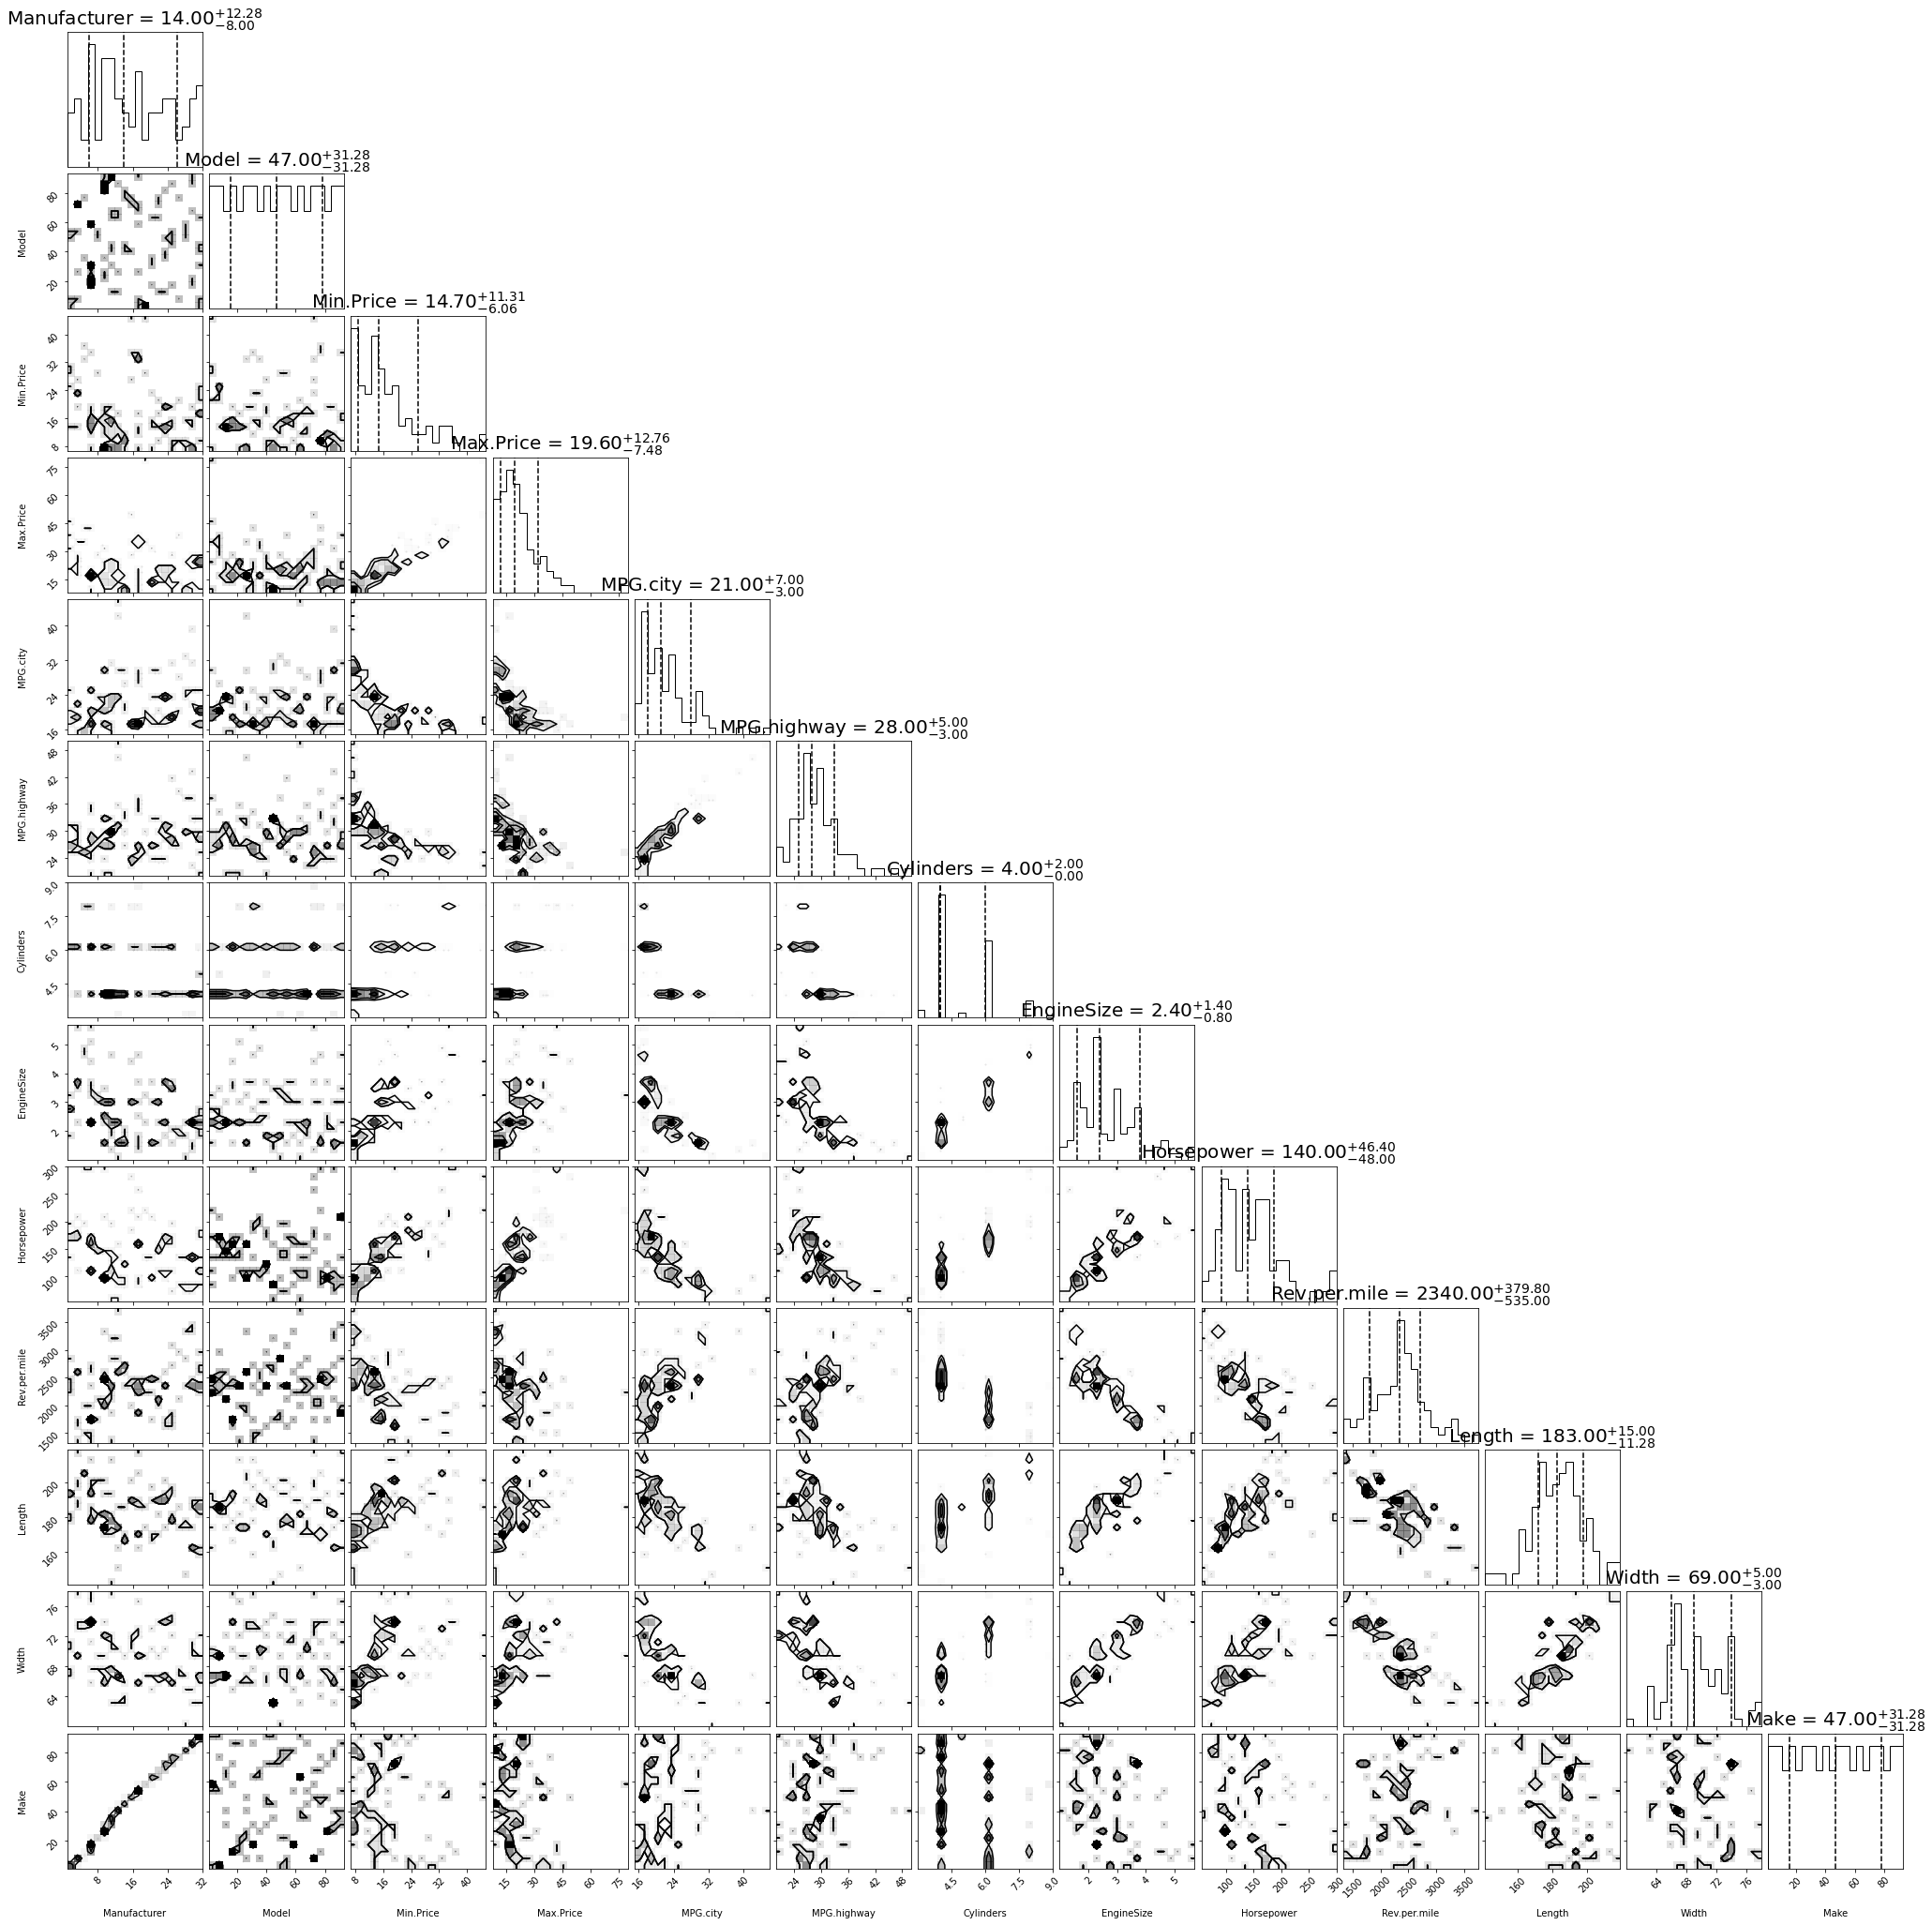

In [434]:
# Observando correlación entre las variables
# Escogiendo variables que tienen menos correlación entre si 
import corner

figure = corner.corner(data_c[key1], labels=key1,
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 20})

In [435]:
# Reescalando 
from sklearn.preprocessing import StandardScaler

data_scaled = StandardScaler().fit_transform(data_c[key1])

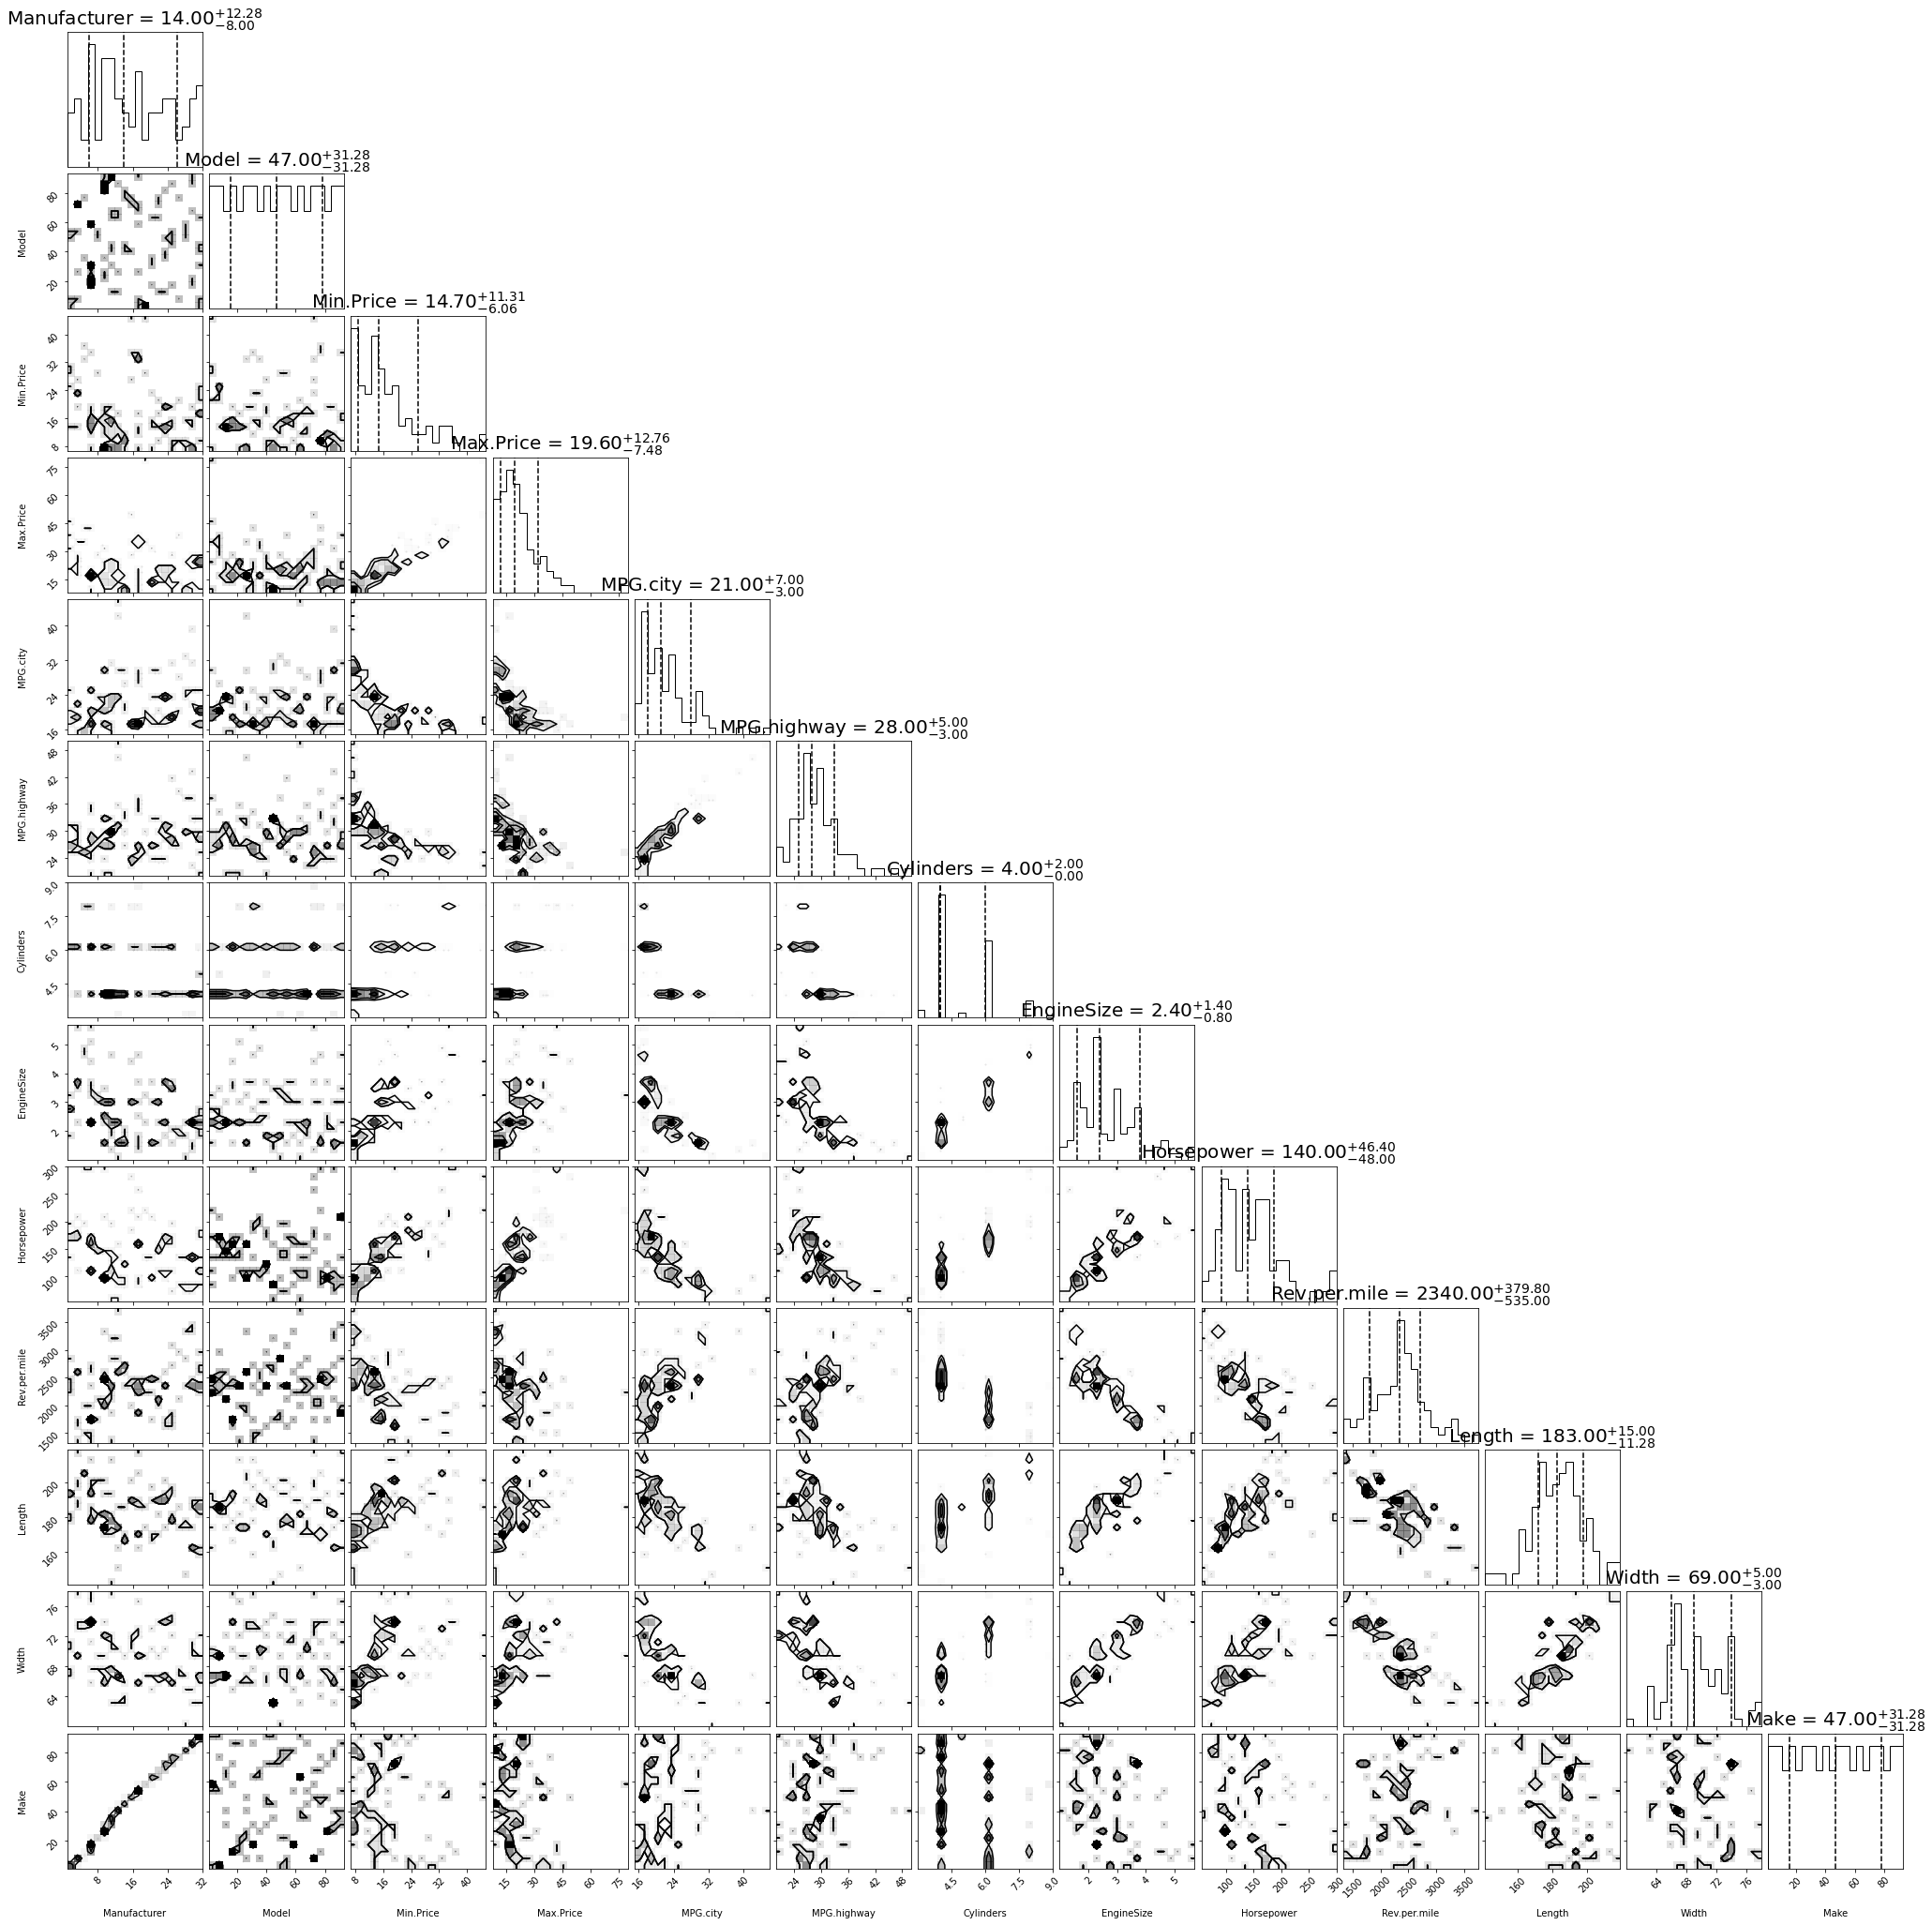

In [436]:
import corner

figure = corner.corner(data_c[key1], labels=key1,
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 20})

In [437]:
#data=data.drop(['Type', 'AirBags', 'DriveTrain', 'RPM', 'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Wheelbase', 'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight' , 'Origin'], axis=1)
#data.head()


A partir de las gráficas encontradas, formulo la hipótesis que las variables que más influyes en el precio de un auto son:  **Model y Make**

# Evaluando la hiótesis

In [438]:
# Cargar el método

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [439]:
# Importamos algunos métodos de sklearn

from sklearn.model_selection import train_test_split

model = RandomForestClassifier(n_estimators=12, max_depth=10)

X_train, X_test, Y_train, Y_test = train_test_split(np.array(data_c[key1]),Y)

model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

np.shape(data_c), np.shape(X_train), np.shape(X_test)

((93, 14), (69, 13), (24, 13))

In [440]:
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=12,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [441]:
Y_pred=model.predict(X_test)
Y_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1])

In [442]:
#Calculando la predicción
acc = sum(Y_pred == Y_test)/len(Y_test)
acc

1.0

In [443]:
# Calculamos la importancia de los parametros
importances = model.feature_importances_
importances

array([0.02479705, 0.0075021 , 0.37500376, 0.16025422, 0.05023512,
       0.01117994, 0.11056834, 0.00717153, 0.18521169, 0.0101838 ,
       0.00413075, 0.02990663, 0.02385506])

In [444]:
# Organizamos los parametros de menor a mayor
ii = np.argsort(importances)[::-1]
np.array(key1)[ii]

array(['Min.Price', 'Horsepower', 'Max.Price', 'Cylinders', 'MPG.city',
       'Width', 'Manufacturer', 'Make', 'MPG.highway', 'Rev.per.mile',
       'Model', 'EngineSize', 'Length'], dtype='<U12')

Por lo cual se verifica que las variables que afectan en mayor medida el precio de los carros son: Modely Make. Sin embargo, vale la pena mencionar que este resultado es suceptible al numero de estimadores que se tomen. 